# MPS using the deesse wrapper - custom search neighborhood

## Main points addressed:
- setting custom search ellipsoid

## Import what is required

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# import from package 'geone'
from geone import img
import geone.imgplot as imgplt
import geone.customcolors as ccol
import geone.deesseinterface as dsi

## Training image (TI)
Read the training image.

In [2]:
ti = img.readImageGslib('ti.gslib')

Plot the image using the function `imgplt.drawImage2D`.

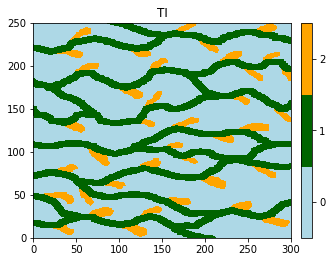

In [3]:
col = ['lightblue', 'darkgreen', 'orange']

plt.figure(figsize=(5,5))
imgplt.drawImage2D(ti, categ=True, categCol=col, title='TI')

## Custom search ellipsoid (class `dsi.SearchNeighborhoodParameters`)
To simulate a cell in the simulation grid, the pattern made up of (at most) the `nneighboringNode` informed cells the closest to the simulated cell is retrieved. Only the cells within a search ellipsoid centered at the simulated cell are considered. The search ellipsoid is defined by
- `rx`, `ry`, `rz`: radii in each direction, in number of cells,
- `ax`, `ay`, `az`: anisotropy ratios (or inverse units): the distance to the central node is the Euclidean distance with cell unit: `1/ax` by `1/ay` by `1/az`
- `angle1`, `angle2`, `angle3`: azimuth, dip, and plunge angles in degrees (default:`0`, `0`, `0`) to re-orient the search ellipsoid
- `power`: a power (default: `0`) at which the distance to the central cell is raised, to get the weight of the pattern cells

Several modes are available to set the radii (`radiusMode`), in particular:
- `large_default` (default): large radii automatically computed according to the size of the simulation grid and the TI
- `manual`: the parameters `rx`, `ry`, `rz` are required (set manually)

Several modes are available to set the anisotropy ratios (`anisotropyRatioMode`), in particular:
- `one` (default): anisotropy ratios automatically set to `ax=ay=az=1.0`
- `radius`: anisotropy ratios automatically set to the corresponding radius, `ax=rx`, `ay=ry`, `az=rz`, so that the distance on the border of the search ellipsoid is equal to one
- `manual`: `ax`, `ay`, `az` are required (set manually)

**Notes:** 
- It can be useful to limit the size of the search ellipsoid (by setting the radii) in presence of a small hard data set, in order to avoid realizations with too poor variability.
- It can be useful to set the anisotropy ratios manually to preferentially search in some direction(s) when retrieving the pattern for simulating a cell.

### Examples using different search neigbhorhood ellipsoids

#### Simulation with default search ellipsoid

In [4]:
# Default search ellipsoid
deesse_input = dsi.DeesseInput(
    nx=100, ny=100, nz=1,
    nv=1, varname='code',
    nTI=1, TI=ti,
    distanceType='categorical',
    nneighboringNode=24,
    distanceThreshold=0.05,
    maxScanFraction=0.25,
    npostProcessingPathMax=1,
    seed=444,
    nrealization=1)

deesse_output1 = dsi.deesseRun(deesse_input)

Deesse running... [VERSION 3.2 / BUILD NUMBER 20200606 / OpenMP 7 thread(s)]
Deesse run complete


#### Simulation with small search ellipsoid by setting the radii manually

In [5]:
# Search ellipsoid with small radii
snp = dsi.SearchNeighborhoodParameters(
    radiusMode='manual', rx=10, ry=10, rz=0
)

deesse_input = dsi.DeesseInput(
    nx=100, ny=100, nz=1,
    nv=1, varname='code',
    nTI=1, TI=ti,
    distanceType='categorical',
    searchNeighborhoodParameters = snp, # set search neighborhood parameters (ellipsoid)
    nneighboringNode=24,
    distanceThreshold=0.05,
    maxScanFraction=0.25,
    npostProcessingPathMax=1,
    seed=444,
    nrealization=1)

deesse_output2 = dsi.deesseRun(deesse_input)

Deesse running... [VERSION 3.2 / BUILD NUMBER 20200606 / OpenMP 7 thread(s)]
Deesse run complete


#### Simulation with anisotropic search ellipsoid (preferential search in one direction)

In [6]:
# Anisotropic search ellipsoid with preferential search in x-direction
snp = dsi.SearchNeighborhoodParameters(
    anisotropyRatioMode='manual', ax=20, ay=1, az=1
)

deesse_input = dsi.DeesseInput(
    nx=100, ny=100, nz=1,
    nv=1, varname='code',
    nTI=1, TI=ti,
    distanceType='categorical',
    searchNeighborhoodParameters = snp, # set search neighborhood parameters (ellipsoid)
    nneighboringNode=24,
    distanceThreshold=0.05,
    maxScanFraction=0.25,
    npostProcessingPathMax=1,
    seed=444,
    nrealization=1)

deesse_output3 = dsi.deesseRun(deesse_input)

Deesse running... [VERSION 3.2 / BUILD NUMBER 20200606 / OpenMP 7 thread(s)]
Deesse run complete


#### Results and display

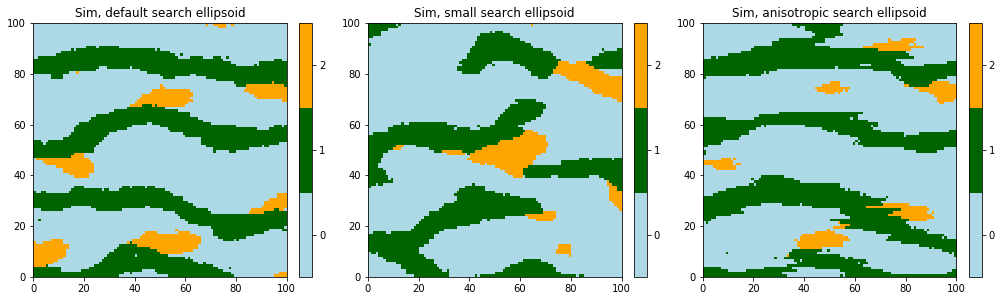

In [7]:
# Retrieve the realizations
sim1 = deesse_output1['sim']
sim2 = deesse_output2['sim']
sim3 = deesse_output3['sim']

# Display
plt.subplots(1, 3, figsize=(17,5)) # 1 x 3 sub-plots

plt.subplot(1, 3, 1)
imgplt.drawImage2D(sim1[0], categ=True, categCol=col, title='Sim, default search ellipsoid') # plot real

plt.subplot(1, 3, 2)
imgplt.drawImage2D(sim2[0], categ=True, categCol=col, title='Sim, small search ellipsoid') # plot real

plt.subplot(1, 3, 3)
imgplt.drawImage2D(sim3[0], categ=True, categCol=col, title='Sim, anisotropic search ellipsoid') # plot real